In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [281]:
data_pd = pd.read_csv("./ml-new-beginning/datasets/Iris.csv")

In [282]:
data_pd.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [337]:
# Input
# X = data_pd.loc[:, ["lotsize", "bedrooms"]].values
X = data_pd.loc[:99, ["SepalLengthCm", "PetalLengthCm"]].values

In [338]:
# output
# Y = data_pd.loc[:, "price"].values
Y = data_pd.loc[:99, "Species"].values
Y = np.where(Y == "Iris-setosa", 1, -1)

In [339]:
X.shape, Y.shape

((100L, 2L), (100L,))

In [349]:
X_std = np.copy(X)

In [350]:
X_1 = np.zeros(X.shape)

In [351]:
X_1[:,0] = (X_std[:,0] - float(X_std[:,0].mean())) / X_std[:,0].std()
X_1[:,1] = (X_std[:,1] - float(X_std[:,1].mean())) / X_std[:,1].std()
# Y_1 = (Y - float(Y.mean())) / Y.std()

In [363]:
class Adaline(object):
    def __init__(self, eta=0.001, iter=100):
        self.eta = eta
        self.iter = iter
        self.w_ = np.zeros(np.shape(X)[1] + 1)
        self.cost_ = []
    
    def input_function(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        # print self.w_
        return np.where(self.input_function(X) >= 0, 1, -1)
     
    def fit(self, X, Y):
        for _ in range(self.iter):
            output = input_function(self.w_, X)
            error = Y - predict(self.w_, X)
            # print error
            self.cost_.append((error**2).sum()/2.0)
            activation1 = self.eta * error.sum()
            # print activation1
            self.w_[0] += activation1
            activation2 = (self.eta * np.dot(error.T, X))
            self.w_[1:] += activation2
        return self

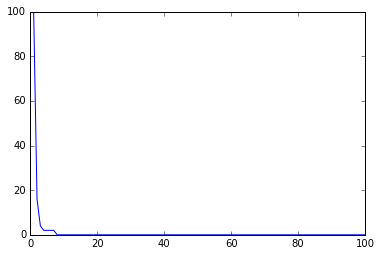

In [372]:
ada = Adaline()
model = ada.fit(X_1, Y)
# model = ada.fit(X, Y)
plt.plot(range(1, model.iter + 1), model.cost_)
plt.show()

In [373]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot


def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # print np.array([xx1.ravel(), xx2.ravel()]).T
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # print Z
    # print type(Z)
    Z = Z.reshape(xx1.shape)
    pyplot.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    pyplot.xlim(xx1.min(), xx1.max())
    pyplot.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        pyplot.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

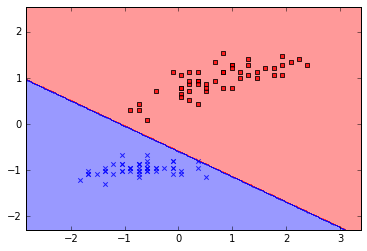

In [375]:
plot_decision_regions(X_1, Y, ada)